In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv("C:\\Users\\cheta\\Downloads\\adult_dataset.csv")

In [4]:
df.shape

(32561, 15)

In [5]:
df[df['workclass'] == '?'].shape

(1836, 15)

In [6]:
df = df[df['workclass']!='?']
df.head(4)

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K

In [7]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [8]:
df = df[df['occupation'] != "?"]

In [9]:
df = df[df['native.country'] != "?"]

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [13]:
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head(4)

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0

In [14]:
df = df.drop(df_categorical.columns, axis=1)

In [15]:
df = pd.concat([df,df_categorical],axis=1)
df.head(4)

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0

In [16]:
df['income'] = df['income'].astype('category')

In [17]:
df.income.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [48]:
X = df.drop(['income'],axis=1)
y = df['income']

In [49]:
X.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week     workclass     education  marital.status  \
count    30162.000000  30162.000000  30162.000000    30162.000000   
mean        40.931238      2.199324     10.333764        2.580134   
std         11.979984      0.953925      3.812292        1.498016   
min          1.000000      0.000000      0.000000        0.000000   
25%         40.000000      2.000000      9.000000        2.000000   
50%         40.000000      2.000000     11.000000        2.000000   
75%         45.000000      2.000000     12.000000        4.000000   
max         99.000000      6.000000     15.000000        6.000000   

         occupation  relationship          race           sex  native.country  
count  30162.000000  30162.000000  30162.000000  30162.000000    30162.000000  
mean       5.959850      1.418341      3.678602      0.675685       36.382567  
std        4.029566      1.601338      0.834709      0.468126        6.105372  
min        0.000000      0.000000      0.000000      0.000000        0.000000  
25%        2.000000      0.000000      4.000000      0.000000       38.000000  
50%        6.000000      1.000000      4.000000      1.000000       38.000000  
75%        9.000000      3.000000      4.000000      1.000000       38.000000  
max       13.000000      5.000000      4.000000      1.000000       40.000000

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

In [51]:
X_train.head(4)

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
24351   42  289636              9             0             0              46   
15626   37   52465              9             0             0              40   
4347    38  125933             14             0             0              40   
23972   44  183829             13             0             0              38   

       workclass  education  marital.status  occupation  relationship  race  \
24351          2         11               2          13             0     4   
15626          1         11               4           7             1     4   
4347           0         12               2           9             0     4   
23972          5          9               4           0             1     4   

       sex  native.country  
24351    1              38  
15626    1              38  
4347     1              19  
23972    0              38

In [52]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred_default = dt.predict(X_test)

In [55]:
y_pred_traini = dt.predict(X_train)

In [56]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6867
           1       0.60      0.63      0.62      2182

    accuracy                           0.81      9049
   macro avg       0.74      0.75      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [57]:
print(classification_report(y_train, y_pred_traini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15787
           1       1.00      1.00      1.00      5326

    accuracy                           1.00     21113
   macro avg       1.00      1.00      1.00     21113
weighted avg       1.00      1.00      1.00     21113



In [58]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [67]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [68]:
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [69]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.258291 to fit



In [70]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

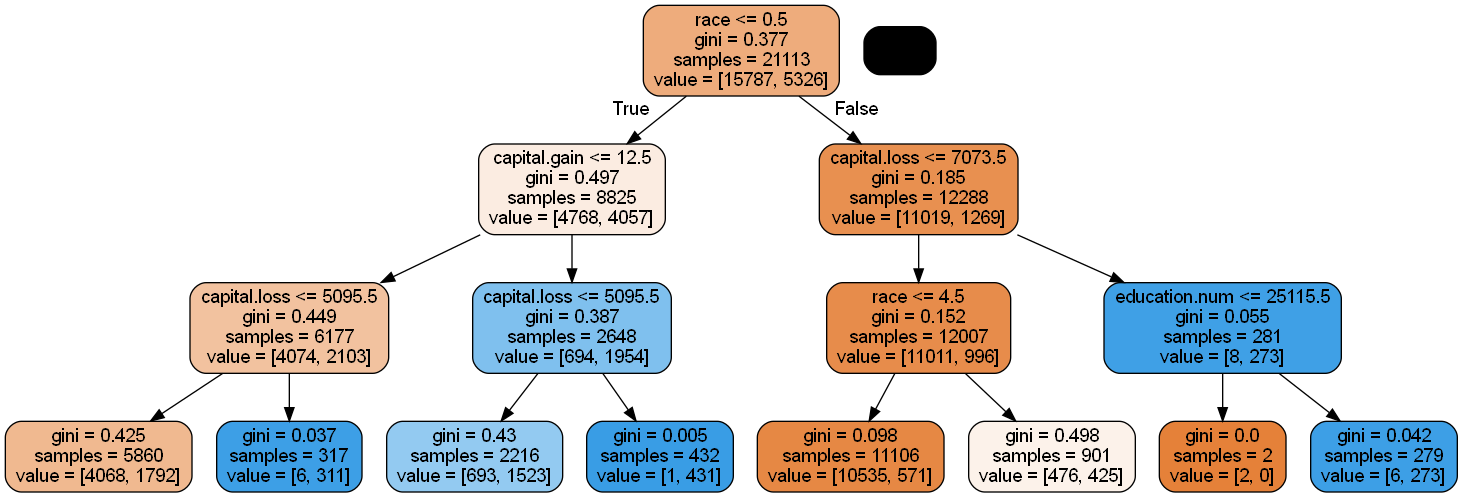

In [71]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [72]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
y_pred_default = dt.predict(X_test)

In [74]:
y_pred_traini = dt.predict(X_train)

In [75]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [76]:
print(classification_report(y_train, y_pred_traini))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     15787
           1       0.78      0.48      0.59      5326

    accuracy                           0.83     21113
   macro avg       0.81      0.72      0.74     21113
weighted avg       0.83      0.83      0.82     21113



In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [78]:
folds = KFold(n_splits=5, shuffle=True, random_state=123)

In [79]:
params = {'max_depth':range(1,25)}

In [80]:
dt = DecisionTreeClassifier(random_state=1)

In [81]:
tree = GridSearchCV(dt,
                   param_grid=params,
                   cv=folds,
                   scoring='accuracy',
                   return_train_score=True)

In [82]:
tree.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 25)}, return_train_score=True,
             scoring='accuracy')

In [84]:
result = tree.cv_results_
pd.DataFrame(result)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.012176      0.002233         0.002193    3.955378e-04   
1        0.014364      0.000796         0.001594    4.890183e-04   
2        0.017755      0.000399         0.001993    4.370285e-07   
3        0.023930      0.001661         0.001801    4.011686e-04   
4        0.026927      0.000631         0.002195    3.988267e-04   
5        0.030079      0.000320         0.001796    3.989940e-04   
6        0.034308      0.000489         0.001995    6.309018e-04   
7        0.039495      0.001850         0.002393    4.898856e-04   
8        0.043887      0.001411         0.002587    4.897664e-04   
9        0.048078      0.001595         0.002246    3.965525e-04   
10       0.049071      0.000748         0.002188    3.975644e-04   
11       0.052658      0.000404         0.002791    1.598144e-03   
12       0.056846      0.003089         0.002593    4.854087e-04   
13       0.064032      0.002312         0.002605    4.943105e-04   
14       0.065820      0.004495         0.002990    1.094423e-03   
15       0.065624      0.005178         0.002992    6.309023e-04   
16       0.067818      0.000892         0.002593    7.969977e-04   
17       0.071806      0.003509         0.002798    4.050413e-04   
18       0.067223      0.004216         0.002594    4.862894e-04   
19       0.068411      0.004301         0.002598    4.954579e-04   
20       0.070211      0.003867         0.002596    8.024482e-04   
21       0.072407      0.006034         0.002391    4.880796e-04   
22       0.066623      0.001322         0.002588    4.895567e-04   
23       0.066424      0.000800         0.002791    7.440233e-04   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.748757           0.751125   
1                2   {'max_depth': 2}           0.821454           0.824059   
2                3   {'max_depth': 3}           0.835425           0.838267   
3                4   {'max_depth': 4}           0.837556           0.843476   
4                5   {'max_depth': 5}           0.841345           0.846081   
5                6   {'max_depth': 6}           0.845371           0.847975   
6                7   {'max_depth': 7}           0.849870           0.850817   
7                8   {'max_depth': 8}           0.844897           0.842292   
8                9   {'max_depth': 9}           0.838503           0.843239   
9               10  {'max_depth': 10}           0.838503           0.849633   
10              11  {'max_depth': 11}           0.838503           0.846318   
11              12  {'max_depth': 12}           0.837083           0.840398   
12              13  {'max_depth': 13}           0.832347           0.837319   
13              14  {'max_depth': 14}           0.828321           0.837556   
14              15  {'max_depth': 15}           0.826900           0.834715   
15              16  {'max_depth': 16}           0.822875           0.827848   
16              17  {'max_depth': 17}           0.823822           0.824769   
17              18  {'max_depth': 18}           0.814350           0.822401   
18              19  {'max_depth': 19}           0.813640           0.816718   
19              20  {'max_depth': 20}           0.806536           0.819323   
20              21  {'max_depth': 21}           0.804168           0.814824   
21              22  {'max_depth': 22}           0.801800           0.817902   
22              23  {'max_depth': 23}           0.806772           0.812929   
23              24  {'max_depth': 24}           0.801563           0.812219   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0            0.740469           0.742302  ...         0.747738   
1            0.820033           0.807200  ...         0.819968   
2            0.833767           0.822359  ...         0.834415   
3            0.840635           0.828991  ...         0.839814 

In [85]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=1)

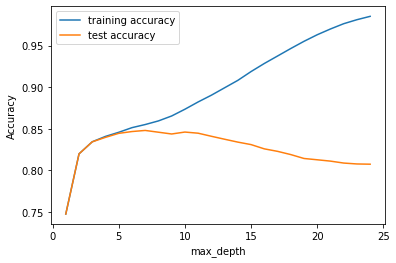

In [86]:
plt.figure()
plt.plot(result["param_max_depth"], 
         result["mean_train_score"], 
         label="training accuracy")
plt.plot(result["param_max_depth"], 
         result["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
parameters = {'min_samples_leaf': range(5, 200, 20)}

In [88]:
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

In [89]:
tree = GridSearchCV(dt, parameters, 
                    cv=folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [91]:
scores = tree.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.067422      0.007343         0.002991        0.000892   
1       0.054049      0.002920         0.002599        0.000493   
2       0.054452      0.001620         0.003194        0.000398   
3       0.059641      0.020064         0.003593        0.001509   
4       0.054244      0.006253         0.002603        0.000786   
5       0.051846      0.003830         0.002605        0.000797   
6       0.048666      0.003750         0.002606        0.000473   
7       0.044689      0.001936         0.002587        0.000483   
8       0.042488      0.001482         0.002596        0.000495   
9       0.044079      0.002128         0.002195        0.000398   

  param_min_samples_leaf                     params  split0_test_score  \
0                      5    {'min_samples_leaf': 5}           0.817428   
1                     25   {'min_samples_leaf': 25}           0.833057   
2                     45   {'min_samples_leaf': 45}           0.848686   
3                     65   {'min_samples_leaf': 65}           0.849159   
4                     85   {'min_samples_leaf': 85}           0.847265   
5                    105  {'min_samples_leaf': 105}           0.845844   
6                    125  {'min_samples_leaf': 125}           0.841345   
7                    145  {'min_samples_leaf': 145}           0.839451   
8                    165  {'min_samples_leaf': 165}           0.838740   
9                    185  {'min_samples_leaf': 185}           0.837083   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.820033           0.824059           0.824964  ...   
1           0.845134           0.839214           0.842965  ...   
2           0.846555           0.847739           0.837518  ...   
3           0.844423           0.855079           0.838939  ...   
4           0.845607           0.853422           0.839649  ...   
5           0.841582           0.852948           0.837518  ...   
6           0.841582           0.852711           0.836807  ...   
7           0.843239           0.853895           0.836807  ...   
8           0.843713           0.852238           0.833018  ...   
9           0.842292           0.845607           0.832781  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.821674        0.002730               10            0.915216   
1         0.841378        0.004837                9            0.867792   
2         0.847487        0.006182                3            0.861101   
3         0.848719        0.006444                1            0.856898   
4         0.848245        0.005623                2            0.854885   
5         0.846682        0.006754                4            0.853582   
6         0.845640        0.007284                6            0.851332   
7         0.845877        0.007709                5            0.849082   
8         0.844693        0.008391                7            0.848668   
9         0.842419        0.007396                8            0.845826   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.914150            0.912611            0.913149   
1            0.871818            0.867732            0.872476   
2            0.863055            0.859503            0.864010   
3            0.858496            0.856128            0.860281   
4            0.855240            0.853464            0.855900   
5            0.851569            0.851332            0.853531   
6            0.847484            0.850207            0.850098   
7            0.847425            0.849674            0.849506   
8            0.847365            0.844819            0.848677   
9            0.845352            0.844109            0.846664   

   split4_train_score  mean_train_score  std_train_score  
0            0.911728          0.913371         0.001211  
1            0.868687          0.869701         0.00

In [92]:
tree.best_estimator_

DecisionTreeClassifier(min_samples_leaf=65, random_state=1)

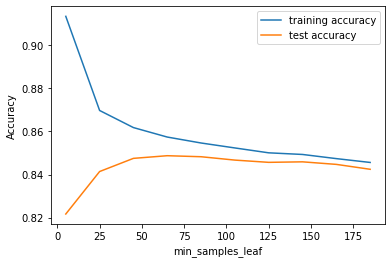

In [93]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
param_grid = {
    'max_depth': range(5, 15, 2),
    'min_samples_leaf': range(20, 100, 10 ),
    'criterion': ["entropy", "gini"]
}

In [95]:
tree = GridSearchCV(dt, param_grid, 
                    cv=folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2),
                         'min_samples_leaf': range(20, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [96]:
tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=20,
                       random_state=1)

In [113]:
tree.best_score_

0.8505187300197774